<center><h1 style="font-size:50px;">CONVOLUTIONAL NEURAL NETWORK USING KERAS</h1></center>
<br> </br>
<br> </br>
<br> </br>
<br> </br>
<br> </br>


<center><h2 style="font-size:20px;"> Haryanto (M07158031)</h2></center>

**Convolutional Neural Network (NN)** is an import branch of Artificial Intelligence and Machine Learning. NN has capability of building and training a model to identify different complicated classes, which is not achievable with conventional linear/nonlinear classifiers, such as Softmax regression, SVM, etc. In addition, we all know that NN is a super hot topic nowadays.

**Structures of (Convolutional) Neural Network**

<center><img src="figures/neuron_model.jpeg"  width="500" alt="The Pulpit Rock"></p>
    Figure 1. - Basic component in Neural Net, connection of neurons in the previous layer to one neuron inthe next layer, which is computing a dot product of their weights with the input followed by a non-linearity activation function.


<p>The layers of a ConvNet have neurons arranged  <img src="figures/cnn.jpeg"  width="500" alt="The Pulpit Rock"align="right" border="5"/> in 3 dimensions: width, height, depth. (Note that the word depth here refers to the third dimension of an activation volume, not to the depth of a full Neural Network, which can refer to the total number of layers in a network.<p> 


<center><img src="figures/neural_net.jpeg"  width="400" alt="The Pulpit Rock"></center>
<center>Figure 2. - Simple one-hidden-layer Neural Net model. The output layer is just a linear classifier, such as softmax.</center>
<br>http://cs231n.github.io/convolutional-networks/</br>

**A convolution neural network** is similar to a multi-layer perceptron network. The major differences are what the network learns, how they are structured and what purpose they are mostly used for. Convolutional neural networks were also inspired from biological processes, their structure has a semblance of the visual cortex present in an animal. CNNs are largely applied in the domain of computer vision and has been highly successful in achieving state of the art performance on various test cases.
<center><img src="figures/convNet.png"  width="800" alt="The Pulpit Rock">
<center>Figure 3. - A complex Convolutional Neural Net, which is Conv layer -> pooling -> Conv layer -> pooling -> two fully-connected layer -> out prediction.</center>

<br>https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f</br>

<center><h1>Example Convolutional For Clasifier Cat and Dog</h1></center>


<center><img src="figures/12.png"  width="800" alt="The Pulpit Rock">

# Import Library

In [2]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("./input/"))

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

['train', 'test']


# Prepare Traning Data

In [3]:
filenames = os.listdir("./input/train/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
  
df = pd.DataFrame({'filename' : filenames, 'category':categories}).astype(str)

In [4]:

df.dtypes

filename    object
category    object
dtype: object

<center><h1>Check Data set</h1></center>

In [5]:
df.head()

,filename,category
0,cat.2793.jpg,0
1,dog.2435.jpg,1
2,cat.3834.jpg,0
3,dog.2189.jpg,1
4,cat.1871.jpg,0


In [6]:
df.tail()

,filename,category
7941,dog.3509.jpg,1
7942,dog.572.jpg,1
7943,cat.3393.jpg,0
7944,dog.829.jpg,1
7945,dog.2966.jpg,1


<center><h1>See Total In count using Bar chart</h1></center>

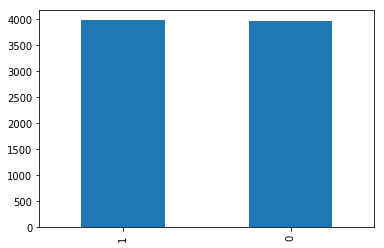

In [7]:
df['category'].value_counts().plot.bar()

From our data we have 4000 cats and 4000 dogs

<center><h1>See sample image</h1></center>

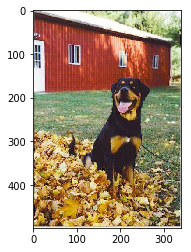

In [45]:
sample = random.choice(filenames)
image = load_img("./input/train/train/"+sample)
plt.imshow(image)

<center><h1>Build Model</h1></center>

<p>The convolutional and pooling layers are followed by a dense fully connected layer that interprets the features extracted by the convolutional part of the model. A flatten layer is used between the convolutional layers and the dense layer to reduce the feature maps to a single one-dimensional vector.</p>

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

<br>https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/</br>

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2

<center><h1>Callbacks</h1></center>
<p>A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.</p>

<br>https://keras.io/callbacks/</br>

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

early stop is techniq for Stop training when a monitored quantity has stopped improving. 
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [11]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**
<p>Models often benefit from reducing the learning rate by a factor of **2-10 once learning stagnates**. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.</p>
<br>We will reduce the learning rate when then accuracy not increase for 2 steps</br>

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [13]:
callbacks = [earlystop, learning_rate_reduction]

<center><h1>Prepare Test and Train Data</h1></center>

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

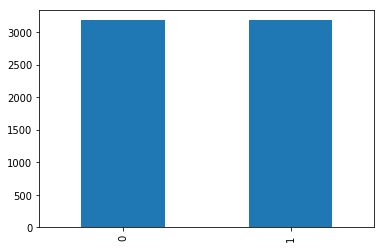

In [15]:
train_df['category'].value_counts().plot.bar()

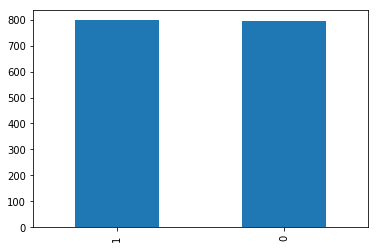

In [16]:
validate_df['category'].value_counts().plot.bar()

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

<center><h1> Traning Generator</h1></center>

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 6355 images belonging to 2 classes.


<center><h1> Validation Generator</h1><c/enter>

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 1590 images belonging to 2 classes.


<center><h1> Fit Model</h1><c/enter>

<br></br>
The Keras utility we use for this purpose is  *ImageDataGenerator*.

*from keras.preprocessing.image import ImageDataGenerator*

This function works by flipping, rescaling, zooming, and shearing the images. The first argument rescale ensures the images are rescaled to have pixel values between zero and one. horizontal_flip=True means that the images will be flipped horizontally. All these actions are part of the image augmentation.
<center><img src="figures/13.png"  width="400" alt="The Pulpit Rock">

<br>https://heartbeat.fritz.ai/a-beginners-guide-to-convolutional-neural-networks-cnn-cf26c5ee17ed</br>

In [20]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
423/423 [==============================] - 317s 750ms/step - loss: 0.8582 - acc: 0.5806 - val_loss: 0.9945 - val_acc: 0.5509
Epoch 2/50
423/423 [==============================] - 311s 736ms/step - loss: 0.6643 - acc: 0.6485 - val_loss: 0.5949 - val_acc: 0.6836
Epoch 3/50
423/423 [==============================] - 314s 741ms/step - loss: 0.5934 - acc: 0.6865 - val_loss: 0.5984 - val_acc: 0.6711
Epoch 4/50
423/423 [==============================] - 310s 733ms/step - loss: 0.5558 - acc: 0.7167 - val_loss: 0.6006 - val_acc: 0.6887
Epoch 5/50
423/423 [==============================] - 314s 743ms/step - loss: 0.5255 - acc: 0.7313 - val_loss: 0.5024 - val_acc: 0.7579
Epoch 6/50
423/423 [==============================] - 314s 742ms/step - loss: 0.5043 - acc: 0.7593 - val_loss: 0.7188 - val_acc: 0.6755
Epoch 7/50
423/423 [==============================] - 319s 755ms/step - loss: 0.4709 - acc: 0.7794 - val_loss: 0.4692 - val_acc: 0.7799


<center><h1> Save Model</h1></center>

In [21]:
model.save_weights("model.h5")

<center><h1>Virtualize Training</h1></center>

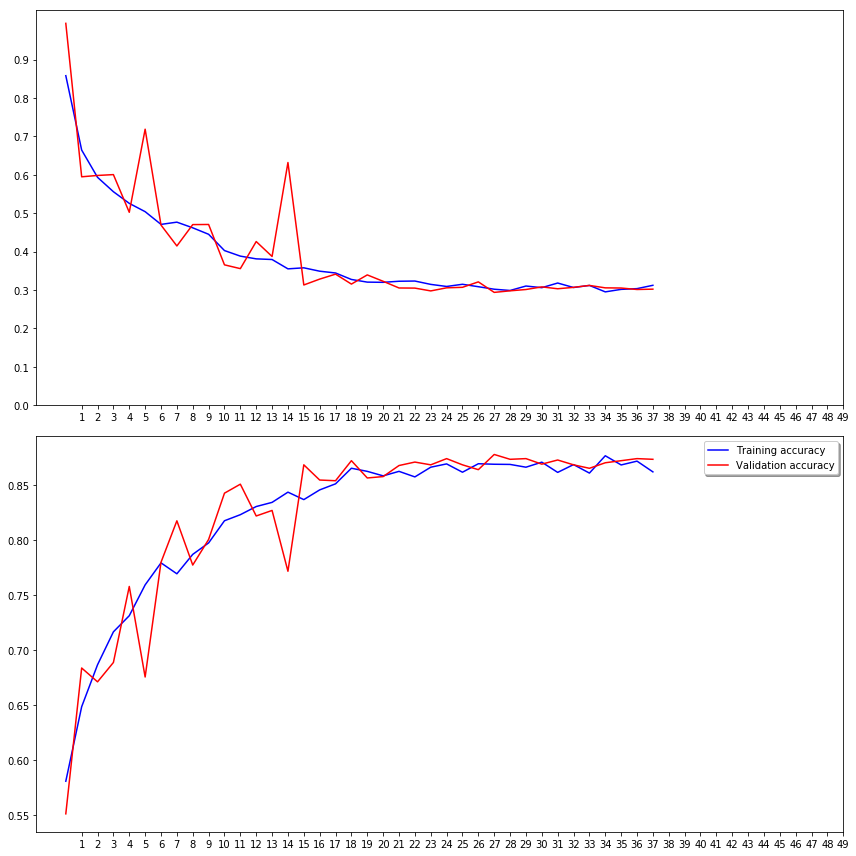

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

<center><h1>Prepare Testing Data</h1></center>

In [23]:
test_filenames = os.listdir("./input/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

<center><h1>Create Testing Generator</h1></center>

In [25]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./input/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 60 images.


<center><h1> Predict</h1></center>

In [26]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

As predicted of binary classification result return probability that image likely to be a dog. So we will have threshold 0.5 which mean if predicted value more than 50% it is a dog and under 50% will be a cat.

In [27]:
threshold = 0.5
test_df['probability'] = predict
test_df['category'] = np.where(test_df['probability'] > threshold, 1,0)

<center><h1>Virtaulize Result</h1><center>

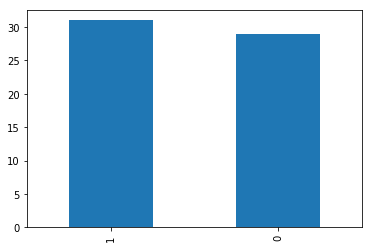

In [28]:
test_df['category'].value_counts().plot.bar()

<center><h1> See predicted result with images</h1></center>

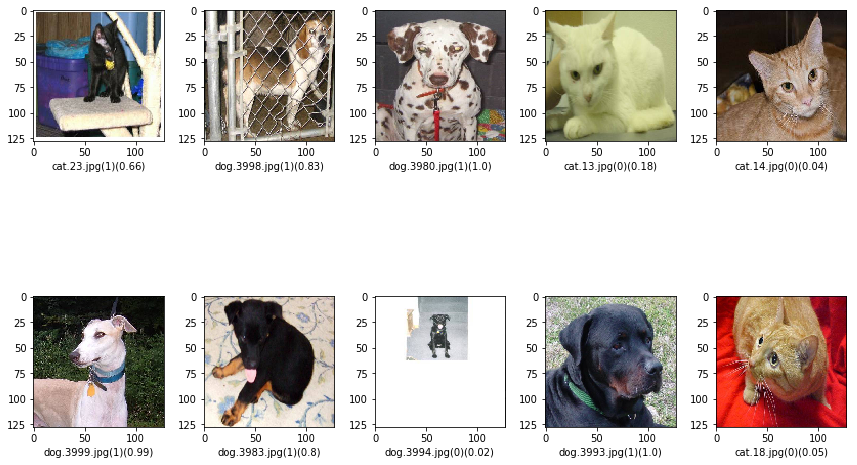

In [43]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    probability = row['probability']
    img = load_img("./input/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 5, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' '(' + "{}".format(round(probability, 2)) + ')')
plt.tight_layout()
plt.show()

<center><h1> Submission</h1></center>

In [30]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

<center><h1 style="font-size:50px;">Thank you for attention !!</h1></center>